# Preparing Wide Form Time Data

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [3]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [4]:
# import wide-form data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRtZ3XGbdzViSOsO6Gam4LQAQTSrFMXSAz_CIcBmmQYBv9uuggbGcxUuqXtMeUPiHR9NyI6At3apf5d/pub?output=csv"
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22,7/1/22,7/2/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181987,182033,182072,182149,182228,182324,182403,182528,182594,182643
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,278211,278504,278793,279077,279077,279167,280298,280851,281470,282141
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,266015,266025,266030,266038,266049,266062,266073,266087,266105,266115
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43774,43774,43774,43774,43774,43774,43774,43774,44177,44177
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,101320,101320,101320,101320,101320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,658503,658503,658503,658503,659853,659853,659853,659853,659853,659853
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11824,11824,11824,11824,11824,11824,11824,11824,11824,11824
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,324922,325110,325110,325110,325348,325498,325498,325857,325857,325857


## pd.melt

In [6]:
# view columns
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/23/22', '6/24/22', '6/25/22', '6/26/22', '6/27/22', '6/28/22',
       '6/29/22', '6/30/22', '7/1/22', '7/2/22'],
      dtype='object', length=897)

In [7]:
# keep Province/State, Country/Region, Lat, and Long with id_vars list
melted = pd.melt(df,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'] )
melted

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
254500,NaN,West Bank and Gaza,31.952200,35.233200,7/2/22,659853
254501,NaN,Winter Olympics 2022,39.904200,116.407400,7/2/22,535
254502,NaN,Yemen,15.552727,48.516388,7/2/22,11824
254503,NaN,Zambia,-13.133897,27.849332,7/2/22,325857


In [25]:
# drop Lat and Long and name variable column "Date" and value column "Confirmed"
melted = pd.melt(df.drop(columns=['Lat','Long']),
                 id_vars=['Province/State', 'Country/Region'],
                value_name="keyword operator from-rainbow">='Confirmed',var_name="Date")
melted

,Province/State,Country/Region,Date,True
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0
3,NaN,Andorra,1/22/20,0
4,NaN,Angola,1/22/20,0
...,...,...,...,...
254500,NaN,West Bank and Gaza,7/2/22,659853
254501,NaN,Winter Olympics 2022,7/2/22,535
254502,NaN,Yemen,7/2/22,11824
254503,NaN,Zambia,7/2/22,325857


In [9]:
# convert Date column to datetime object
melted['Date'] = pd.to_datetime(melted['Date'])

# confirm change
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254505 entries, 0 to 254504
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  79477 non-null   object        
 1   Country/Region  254505 non-null  object        
 2   Date            254505 non-null  datetime64[ns]
 3   True            254505 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.8+ MB


In [10]:
# set Date as index; do NOT resample yet (this will lump all values together by date
# and lose the data separated by country
melted = melted.set_index("Date")
melted

,Province/State,Country/Region,True
Date,,,
2020-01-22,NaN,Afghanistan,0
2020-01-22,NaN,Albania,0
2020-01-22,NaN,Algeria,0
2020-01-22,NaN,Andorra,0
2020-01-22,NaN,Angola,0
...,...,...,...
2022-07-02,NaN,West Bank and Gaza,659853
2022-07-02,NaN,Winter Olympics 2022,535
2022-07-02,NaN,Yemen,11824


## Combining .groupby and .resample for groupwise- time series processing

In [11]:
## view number of countries
melted['Country/Region'].nunique()

199

In [13]:
# use groupby and resample together to avoid losing country data
df_ts = melted.groupby('Country/Region').resample("D").sum()
df_ts

C:\Users\eliud\AppData\Local\Temp\ipykernel_492\778787073.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('Country/Region').resample("D").sum()


True
Country/Region Date              
Afghanistan    2020-01-22       0
               2020-01-23       0
               2020-01-24       0
               2020-01-25       0
               2020-01-26       0
...                           ...
Zimbabwe       2022-06-28  255383
               2022-06-29  255520
               2022-06-30  255586
               2022-07-01  255586
               2022-07-02  255586

[177707 rows x 1 columns]

In [16]:
# we now have a multiIndex
df_ts.head().index

MultiIndex([('Afghanistan', '2020-01-22'),
            ('Afghanistan', '2020-01-23'),
            ('Afghanistan', '2020-01-24'),
            ('Afghanistan', '2020-01-25'),
            ('Afghanistan', '2020-01-26')],
           names=['Country/Region', 'Date'])

## Filtering by Date with a MultiIndex using pd.IndexSlice

In [18]:
# use pd.IndexSlice with .loc to filter for all values in 2020
df_ts.loc[pd.IndexSlice[:, '2020'],:]

True
Country/Region Date             
Afghanistan    2020-01-22      0
               2020-01-23      0
               2020-01-24      0
               2020-01-25      0
               2020-01-26      0
...                          ...
Zimbabwe       2020-12-27  13077
               2020-12-28  13148
               2020-12-29  13325
               2020-12-30  13625
               2020-12-31  13867

[68655 rows x 1 columns]

In [19]:
# filter by both date and country
df_ts.loc[pd.IndexSlice['Afghanistan':'Algeria','2020'],:]

True
Country/Region Date             
Afghanistan    2020-01-22      0
               2020-01-23      0
               2020-01-24      0
               2020-01-25      0
               2020-01-26      0
...                          ...
Algeria        2020-12-27  98249
               2020-12-28  98631
               2020-12-29  98988
               2020-12-30  99311
               2020-12-31  99610

[1035 rows x 1 columns]

## Plotting with a MultiIndex

In [20]:
# create df to plot the number of Confirmed Cases for several countries in North America 
countries = ['Canada','Mexico','US']
plot_df = df_ts.loc[countries].copy()
plot_df

True
Country/Region Date                
Canada         2020-01-22         0
               2020-01-23         2
               2020-01-24         3
               2020-01-25         3
               2020-01-26         3
...                             ...
US             2022-06-28  87296327
               2022-06-29  87490815
               2022-06-30  87627486
               2022-07-01  87821971
               2022-07-02  87838623

[2679 rows x 1 columns]

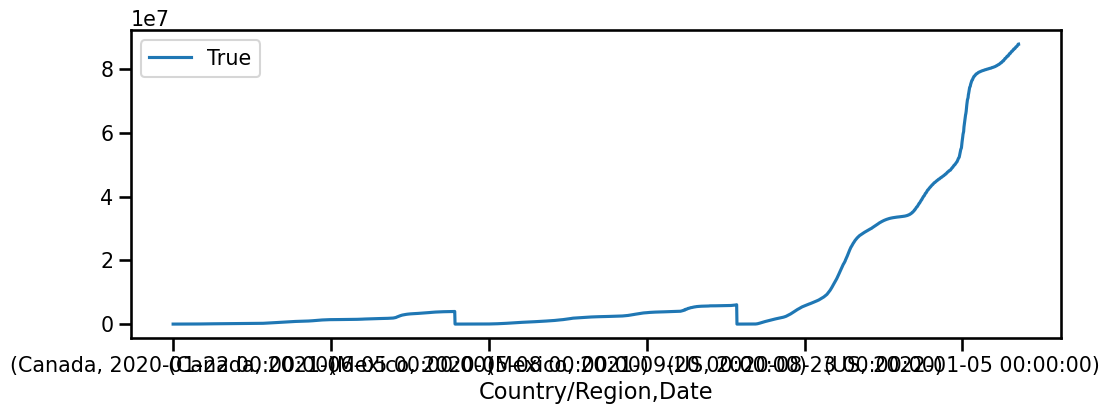

In [21]:
# pandas gets confused when we try to plot using a multiIndex
# it lumps all data into 1 line instead of multiple lines
plot_df.plot(figsize=(12,4));

## Using unstack() for Plotting with a MultiIndex

In [22]:
# unstack allows us to keep Date as index (level 1) and convert Country/Region index (level 0) into columns
unstacked = plot_df.unstack(level=0)
unstacked

True                   
Country/Region   Canada   Mexico        US
Date                                      
2020-01-22            0        0         1
2020-01-23            2        0         1
2020-01-24            3        0         2
2020-01-25            3        0         2
2020-01-26            3        0         5
...                 ...      ...       ...
2022-06-28      3945493  5986917  87296327
2022-06-29      3948112  5986917  87490815
2022-06-30      3954275  6034602  87627486
2022-07-01      3955704  6058689  87821971
2022-07-02      3956897  6058689  87838623

[893 rows x 3 columns]

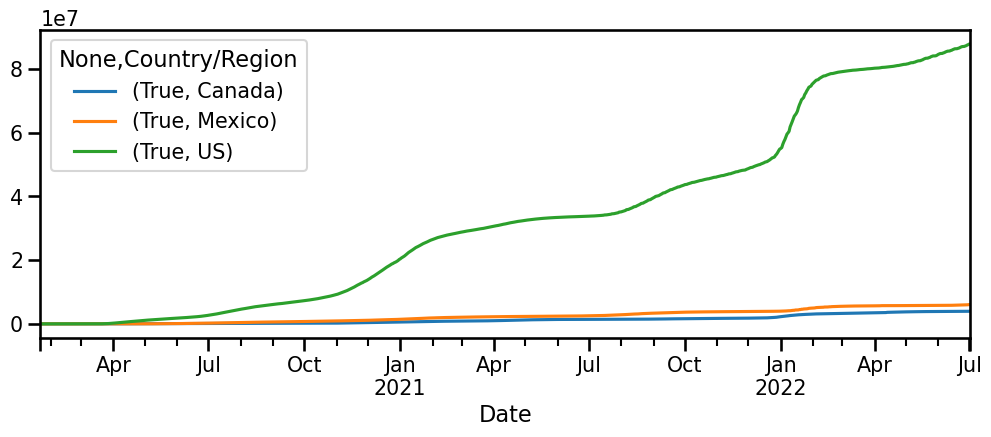

In [26]:
# plot after unstack makes separate column for each country
ax = unstacked.plot()

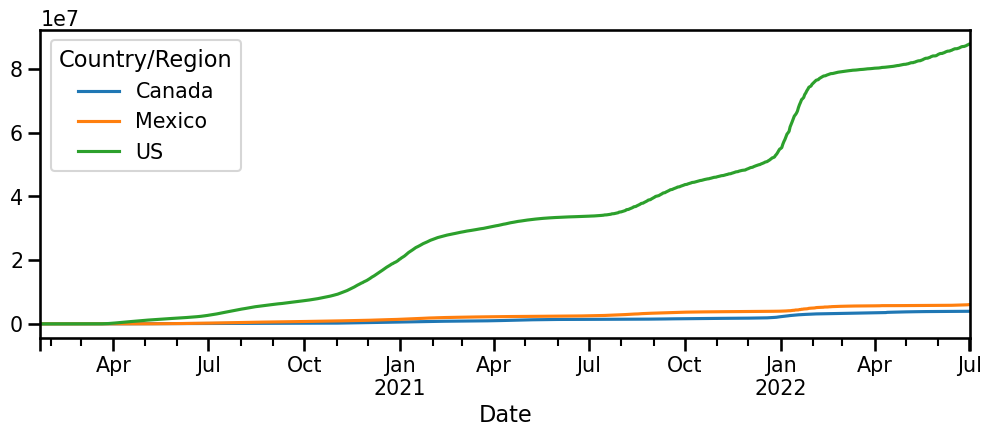

In [30]:
# slice out True column from multiIndex to remove it from legend
unstacked.columns
ax = unstacked[True].plot()

## Select 1 Country to Analyze

In [32]:
# separate US from other countries, but keep all dates
ts_us = df_ts.loc['US', True]
ts_us.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='Date', length=893, freq='D')

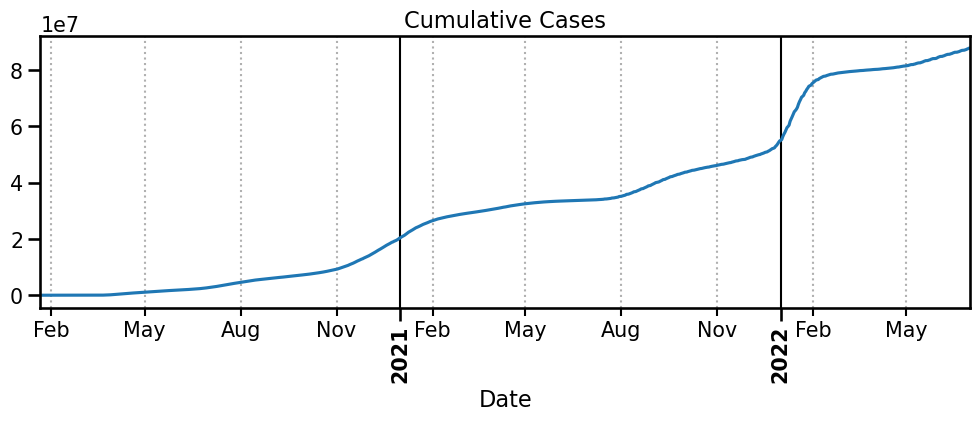

In [33]:
# plot US data only
ax = ts_us.plot(style='-',title="Cumulative Cases");
format_xdates(ax);

In [35]:
# slice out US values into new df
df_us = melted[melted['Country/Region']=='US']

## check for states (spoiler: not found)
df_us

,Province/State,Country/Region,Date,True
257,NaN,US,1/22/20,1
542,NaN,US,1/23/20,1
827,NaN,US,1/24/20,2
1112,NaN,US,1/25/20,2
1397,NaN,US,1/26/20,5
...,...,...,...,...
253337,NaN,US,6/28/22,87296327
253622,NaN,US,6/29/22,87490815
253907,NaN,US,6/30/22,87627486
254192,NaN,US,7/1/22,87821971


# Plotting Data with Different Units

In [37]:
# import csv from jnb
df = pd.read_csv("covid_us_county.csv")
display(df.head())
df.info()

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017826 entries, 0 to 3017825
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   fips        float64
 1   county      object 
 2   state       object 
 3   lat         float64
 4   long        float64
 5   date        object 
 6   cases       int64  
 7   state_code  object 
 8   deaths      int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 207.2+ MB


In [38]:
# view all state abbreviations
df['state_code'].unique()

array(['AL', 'AK', nan, 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [39]:
# create df for missing values in state_code
check = df[df['state_code'].isna()]
check

,fips,county,state,lat,long,date,cases,state_code,deaths
92106,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-22,0,NaN,0
92107,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-23,0,NaN,0
92108,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-24,0,NaN,0
92109,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-25,0,NaN,0
92110,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-26,0,NaN,0
...,...,...,...,...,...,...,...,...,...
2718025,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-08,21103,NaN,119
2718026,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-09,21103,NaN,119
2718027,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-10,21103,NaN,119
2718028,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-11,21175,NaN,119


In [40]:
# view unique missing values in state_code
check['state'].unique()

array(['American Samoa', 'Diamond Princess', 'District of Columbia',
       'Grand Princess', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands'], dtype=object)

In [41]:
# add state codes for territories and cruises
df.loc[ df['state']== 'American Samoa', 'state_code'] = "AS"
df.loc[ df['state']=='District of Columbia', 'state_code'] = "DC"
df.loc[ df['state']== 'Guam', 'state_code'] = "GU"
df.loc[ df['state']== 'Northern Mariana Islands ', 'state_code'] = "MP"
df.loc[ df['state']=='Puerto Rico', 'state_code'] = "PR"
df.loc[ df['state']=='Virgin Islands', 'state_code'] = "VI"
df.loc[ (df['state']=='Diamond Princess') | (df['state']=='Grand Princess'), 'state_code'] = "CR"

# confirm changes
df['state_code'].unique()

array(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'CR', 'DC',
       'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
       'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'NC', 'ND', nan, 'OH', 'OK', 'OR', 'PA', 'PR',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV',
       'WI', 'WY'], dtype=object)

In [42]:
# convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# set date as index
df = df.set_index('date')

# preview changes
df

,fips,county,state,lat,long,cases,state_code,deaths
date,,,,,,,,
2020-01-22,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-23,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-24,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-25,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-26,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
...,...,...,...,...,...,...,...,...
2022-07-08,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19
2022-07-09,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19
2022-07-10,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19


## Visualizing Time Series with Different Magnitudes

In [46]:
# drop unneeded columns
df = df.drop(columns=['fips','lat','long'])
df

,county,state,cases,state_code,deaths
date,,,,,
2020-01-22,Autauga,Alabama,0,AL,0
2020-01-23,Autauga,Alabama,0,AL,0
2020-01-24,Autauga,Alabama,0,AL,0
2020-01-25,Autauga,Alabama,0,AL,0
2020-01-26,Autauga,Alabama,0,AL,0
...,...,...,...,...,...
2022-07-08,Weston,Wyoming,1667,WY,19
2022-07-09,Weston,Wyoming,1667,WY,19
2022-07-10,Weston,Wyoming,1667,WY,19


In [44]:
## resample as daily freq by state
df_ts = df.groupby("state_code").resample("D").sum()
df_ts

C:\Users\eliud\AppData\Local\Temp\ipykernel_492\2045514000.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = df.groupby("state_code").resample("D").sum()


cases  deaths
state_code date                      
AK         2020-01-22       0       0
           2020-01-23       0       0
           2020-01-24       0       0
           2020-01-25       0       0
           2020-01-26       0       0
...                       ...     ...
WY         2022-07-08  165619    1834
           2022-07-09  165619    1834
           2022-07-10  165619    1834
           2022-07-11  165619    1834
           2022-07-12  167386    1845

[50568 rows x 2 columns]

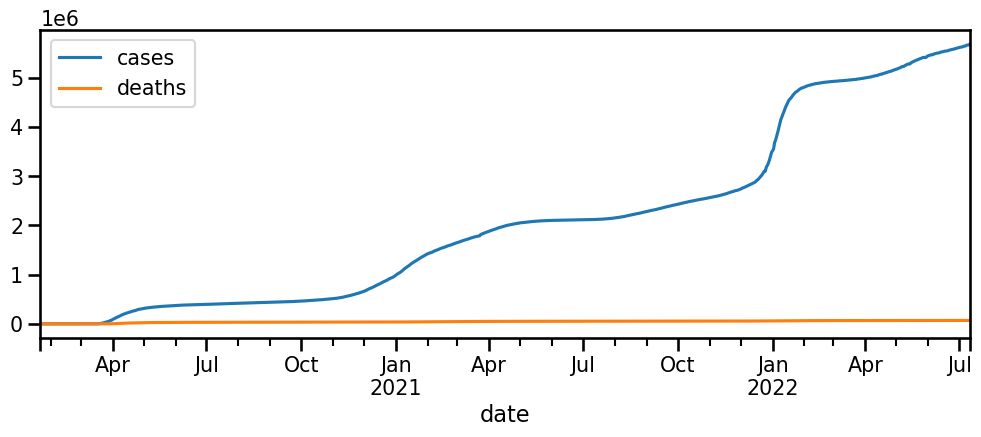

In [47]:
# plot NY
state_ts = df_ts.loc['NY'].copy()
ax = state_ts.plot();

## Using twin axes

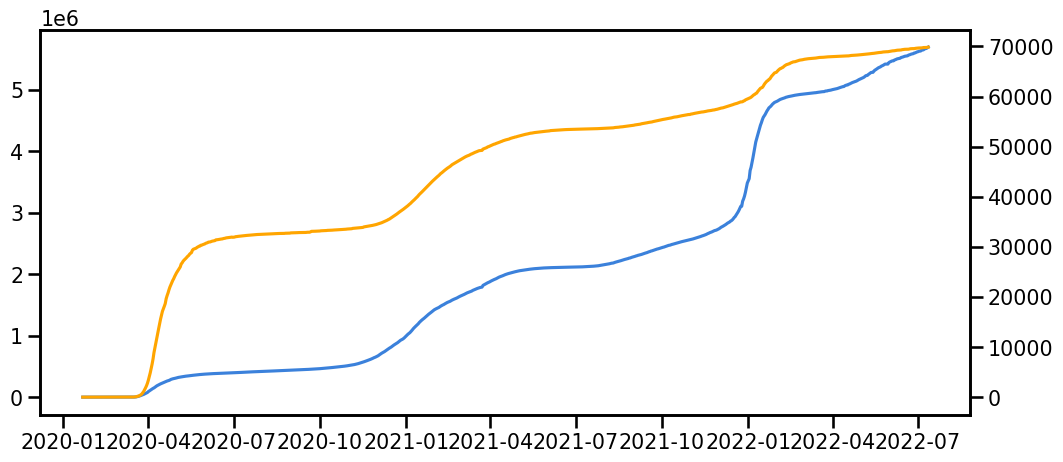

In [49]:
# use twin axes to make death numbers easier to 
fig, ax1 = plt.subplots(figsize=(12,5))
## Plot first line on original ax
ax1.plot(state_ts.index, state_ts['cases'] ,color='#3b81db',label='Cases')
# Make twin axis and plot second line
ax2 = ax1.twinx()
ax2.plot(state_ts.index ,state_ts['deaths'],label='Deaths',color='orange');

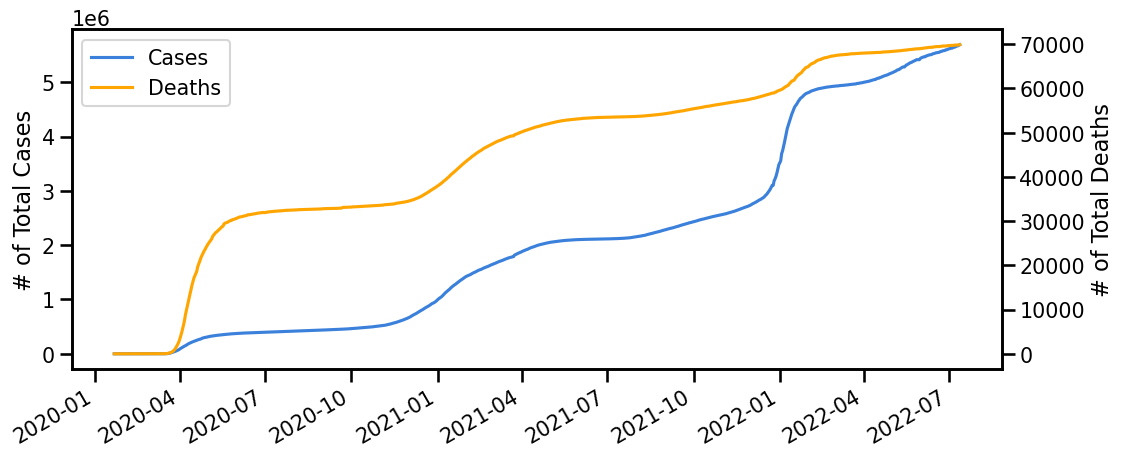

In [50]:
# Solution for having two legends
# Source: https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(state_ts.index, state_ts['cases'] ,color='#3b81db',label='Cases')
ax1.set_ylabel("# of Total Cases")
# Make twin axis
ax2 = ax1.twinx()
ax2.plot(state_ts.index ,state_ts['deaths'],label='Deaths',color='orange')
ax2.set_ylabel("# of Total Deaths")
## Removing the grids
ax1.grid(False)
ax2.grid(False)
## Making joined legend
lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc=0);
fig.autofmt_xdate()

In [52]:
# function for above formatting
def plot_compare_cols(state_ts,col1='cases',color1='#3b81db',
                      col2='deaths',color2='orange',
                     ylabel1="# of Total Cases", ylabel2="# of Total Deaths",
                     figsize=(12,5)):
    """#Solution for having two legends
    # Source: https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
    """
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(state_ts.index, state_ts[col1] ,color=color1,label=col1.title())
    ax1.set_ylabel(ylabel1)
    # Make twin axis
    ax2 = ax1.twinx()
    ax2.plot(state_ts.index ,state_ts[col2],label=col2.title(),color=color2)
    ax2.set_ylabel(ylabel2)
    ## Removing the grids
    ax1.grid(False)
    ax2.grid(False)
    ## Making joined legend
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc=0);
    fig.autofmt_xdate()
    return fig, (ax1,ax2)

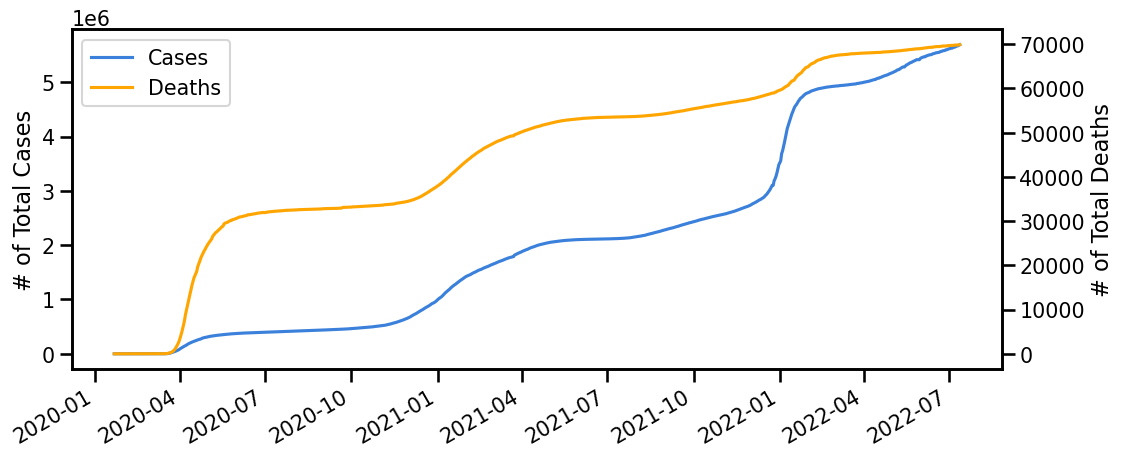

In [53]:
# use function on NY
fig,(ax1,ax2) = plot_compare_cols(state_ts)

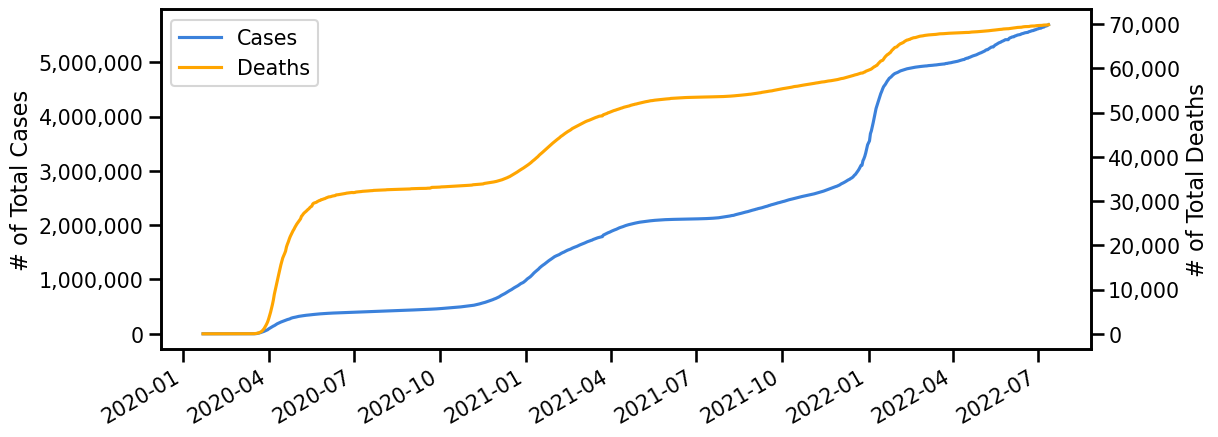

In [55]:
# import mticks for formatting of scientific notation and ticks
import matplotlib.ticker as mticks

# add commas to cases and deaths
str_fmt = mticks.StrMethodFormatter("{x:,.0f}")
str_fmt

fig,(ax1,ax2) = plot_compare_cols(state_ts)
ax1.yaxis.set_major_formatter(str_fmt)
ax2.yaxis.set_major_formatter(str_fmt)

In [56]:
# use funcFormatter to clean up zeros
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats in thousands"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

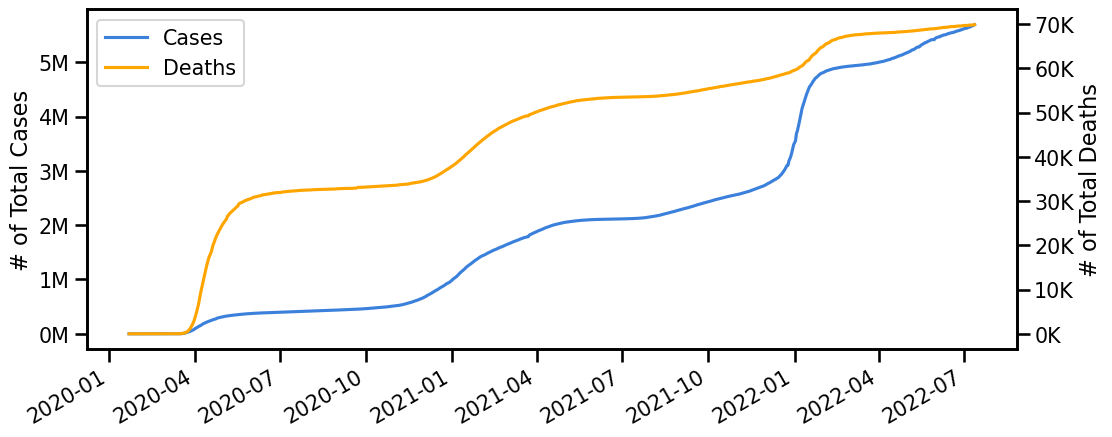

In [57]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)
## Set the axis' major formatter
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)

## Combining Our Tick Formatting with Date Formatting

In [ ]:
# create the locator to place ticks every 1 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")